# Exemplo de notebook

Este notebook mostra como fazer as seguintes tarefas:

1. Montar um circuito básico para gerar um dos estados de Bell
2. Mostrar o circuito
3. Simular e fazer o histograma da distribuição de probabilidades
4. Rodar nos computadores quânticos da IBM (ibmqx2, ibmqx4 e ibmq_16_melbourne)

**Atenção:** Para executar cada comando é necessário pressionar SHIFT-ENTER (o cursor deve estar na caixa correspondente). Para mais detalhes, pressionar ESC-h.


In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram


In [2]:
### Montagem do circuito
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuito = QuantumCircuit(q, c)
circuito.h(q[0])
circuito.cx(q[0], q[1])
circuito.measure(q[0], c[0])
circuito.measure(q[1], c[1])

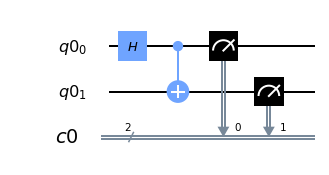

In [3]:
%matplotlib inline
circuito.draw(output='mpl')
# circuito.draw(output='latex')  # segunda opção para visualizar o circuito
# print(circuito)  # terceira opção para visualizar o circuito

In [4]:
## comando para gerar o código QASM do circuito
# print(circuito.qasm())

In [5]:
### Comandos para simular a saída do circuito
simulador = BasicAer.get_backend('qasm_simulator')
job1 = execute(circuito, simulador, shots=1024)
resultado1 = job1.result()
contagem1 = resultado1.get_counts()
print(contagem1)

{'00': 520, '11': 504}


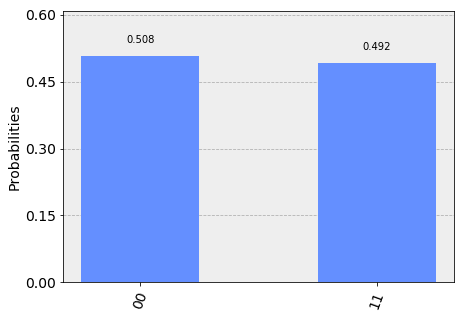

In [6]:
plot_histogram(contagem1)

In [7]:

### Este comando deve ser usado uma única vez, pois o valor do token ficará gravado so seu laptop.
### Vá na página do IBM Q Experience, clique no seu usuário (boneco no alto a direita) para entrar na sua conta. 
### Copie o 'API Token' e cole no comando abaixo.
from qiskit import IBMQ
# IBMQ.save_account('API_Token')

In [8]:
### Este comando só vai funcionar se você conseguiu ter sucesso no comando anterior.
### Este comando deve ser dado toda vez que abrir este notebook
from qiskit import IBMQ
provedor = IBMQ.load_account()

In [9]:
### Lista das máquinas disponíveis. 
provedor.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [10]:
### O comando get_backend seleciona o backend
### O comando execute executa o circuito no IBMQX2
### O job entra na fila. A espera pode demorar MUITAS HORAS.
### O comando job_monitor mostra a posição em tempo real.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina = provedor.get_backend('ibmqx2')
job2 = execute(circuito, maquina, shots=1024)
job_monitor(job2)
resultado2 = job2.result()
contagem2 = resultado2.get_counts()
print(contagem2)

Job Status: job has successfully run
{'10': 6, '00': 475, '01': 17, '11': 526}


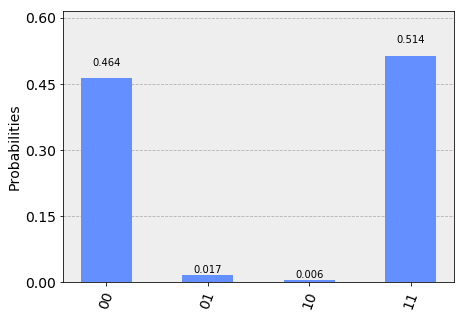

In [11]:
plot_histogram(contagem2)

In [12]:
### Estes comandos executam o circuito no IBMQX4
### O job entra na fila e a posição é mostrada em tempo real. 
### A espera pode demorar muitas horas.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina = provedor.get_backend('ibmq_ourense')
job3 = execute(circuito, maquina, shots=1024)
job_monitor(job3)
resultado3 = job3.result()
contagem3 = resultado3.get_counts()
contagem3

Job Status: job has successfully run


{'00': 472, '01': 14, '10': 19, '11': 519}

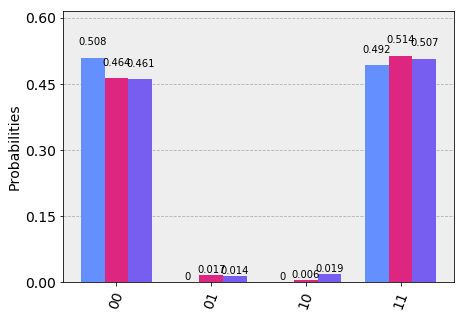

In [13]:
plot_histogram([contagem1,contagem2,contagem3])